# DataSet

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-12-27 14:25:59--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.209.109.125, 2600:1417:76:48c::317f, 2600:1417:76:485::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.209.109.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  52.5MB/s    in 14s     

2023-12-27 14:26:14 (57.4 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [3]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

Input&OUtput

In [4]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/739.jpg 0


In [5]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()


images  label
0  PetImages/Dog/11379.jpg      1
1   PetImages/Cat/4795.jpg      0
2   PetImages/Dog/6711.jpg      1
3   PetImages/Cat/6097.jpg      0
4   PetImages/Cat/4459.jpg      0

In [6]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [7]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [8]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

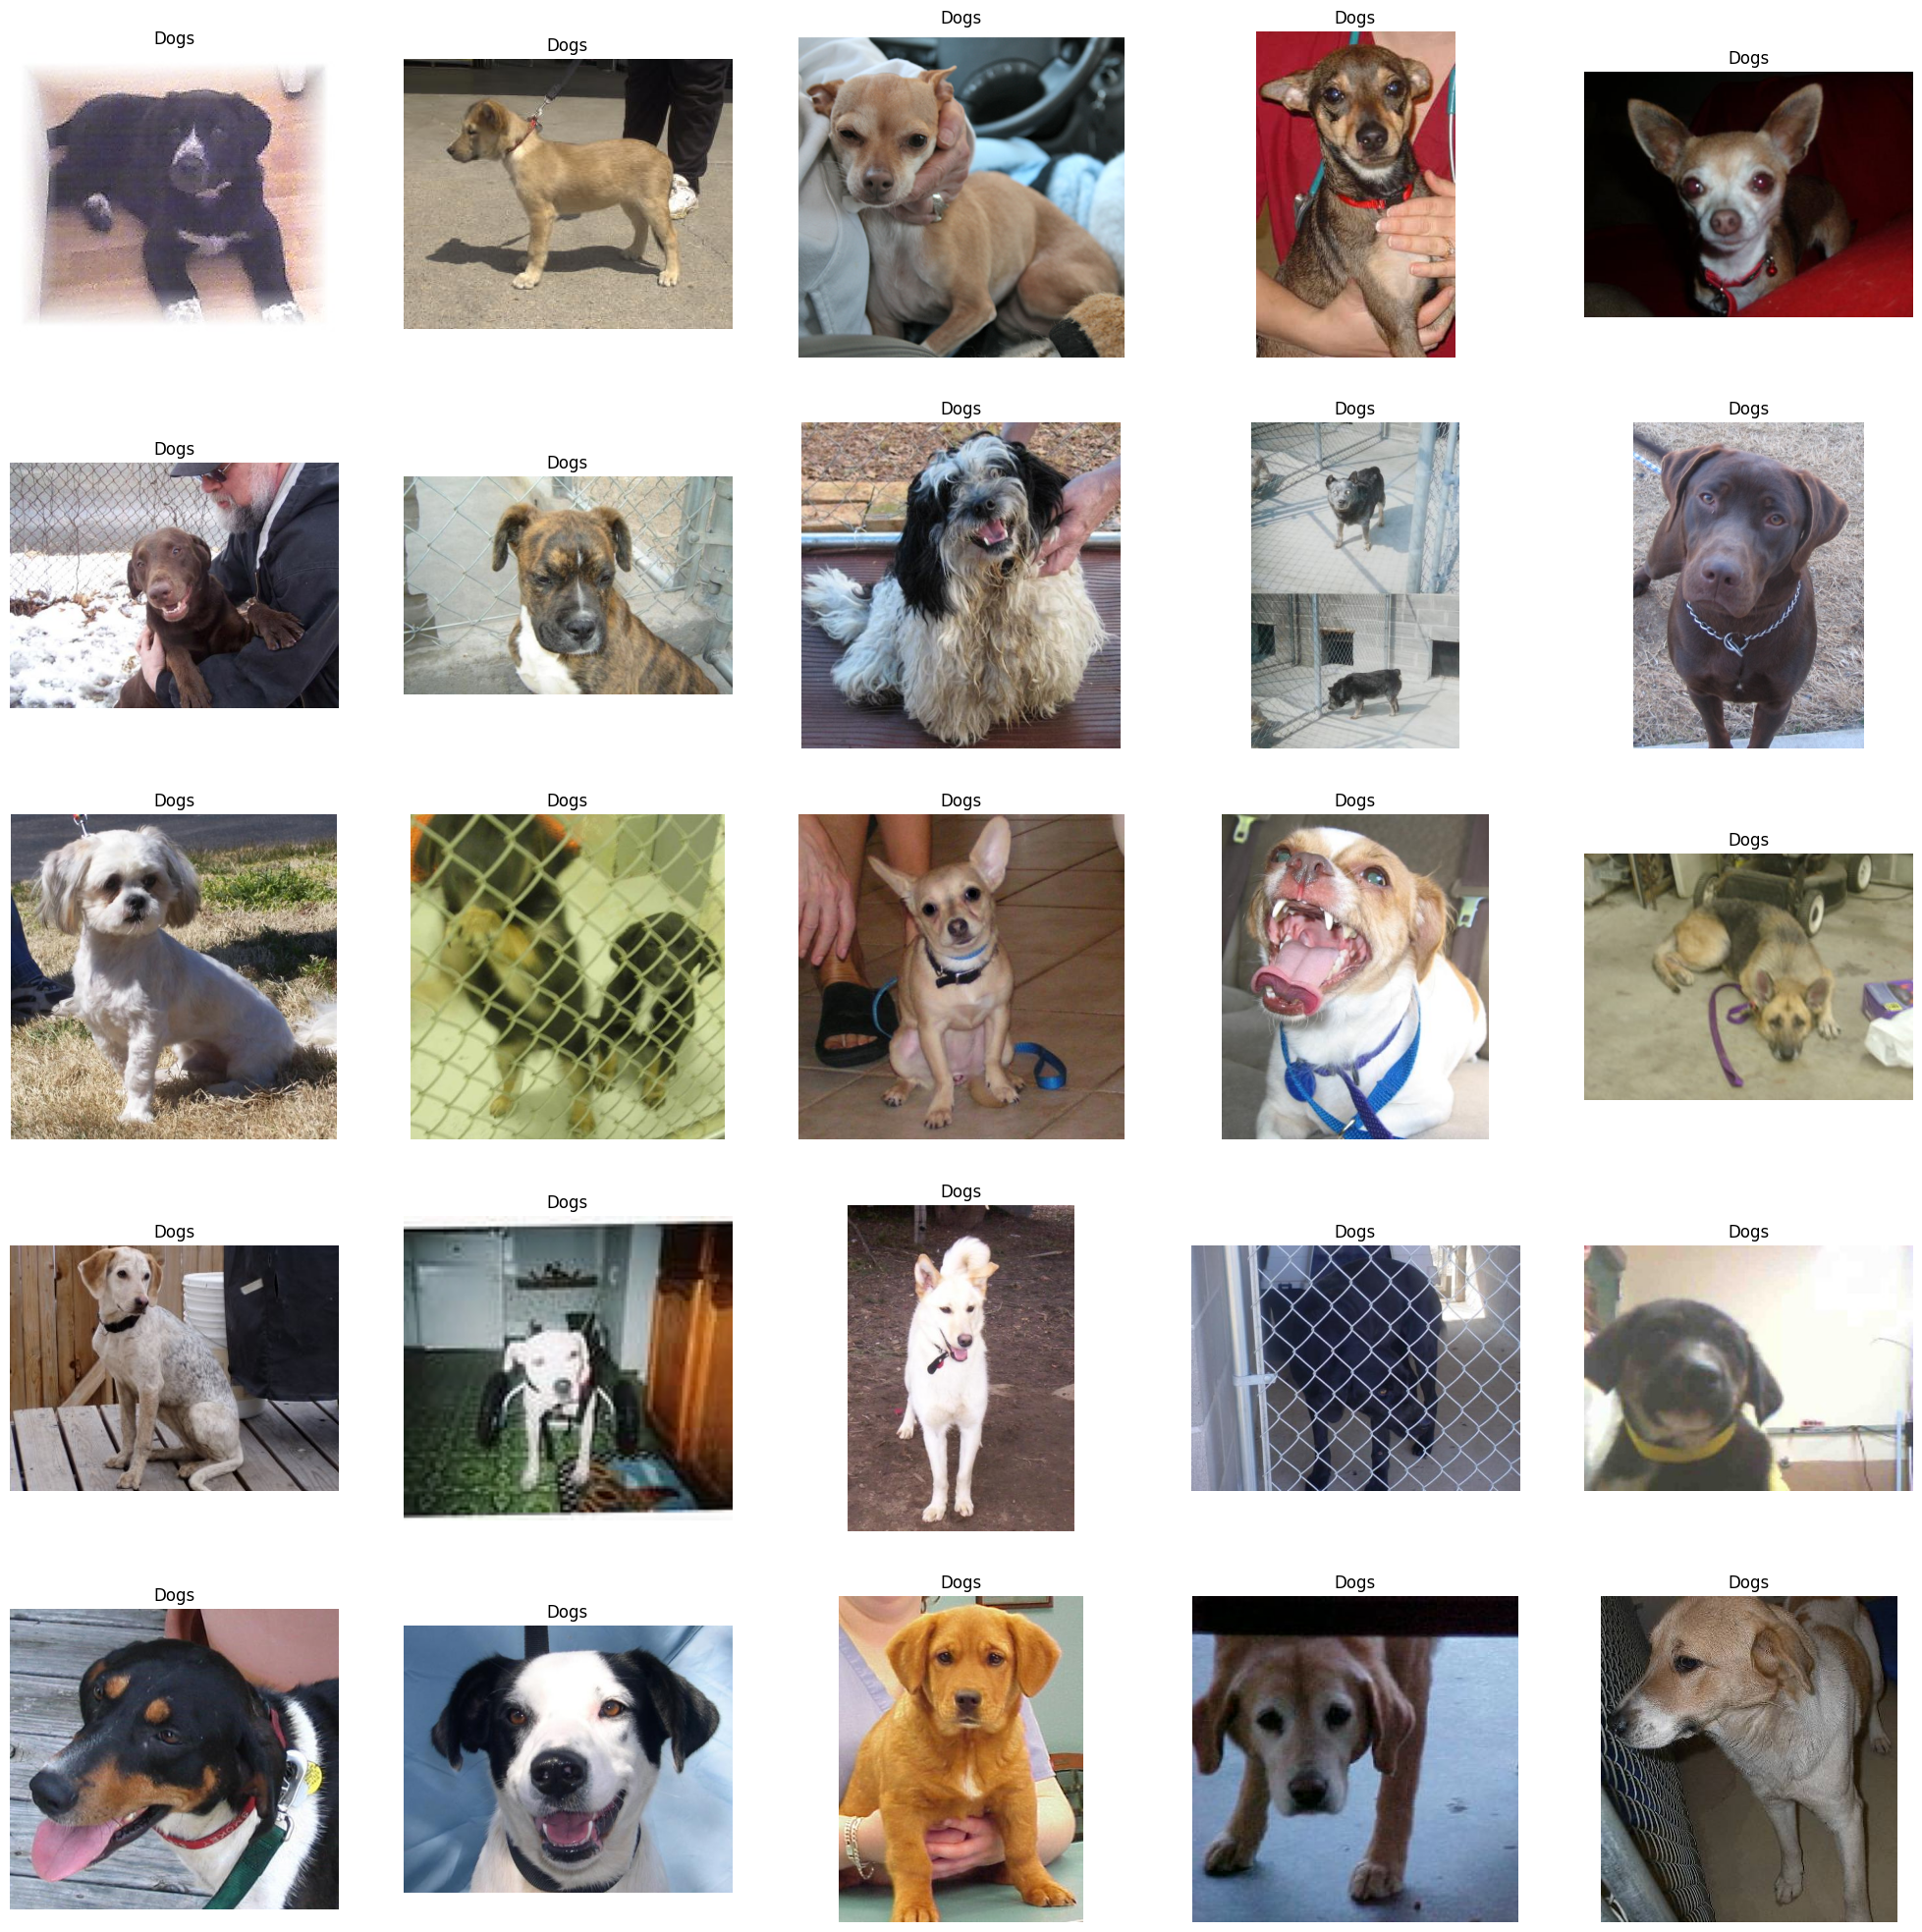

In [10]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

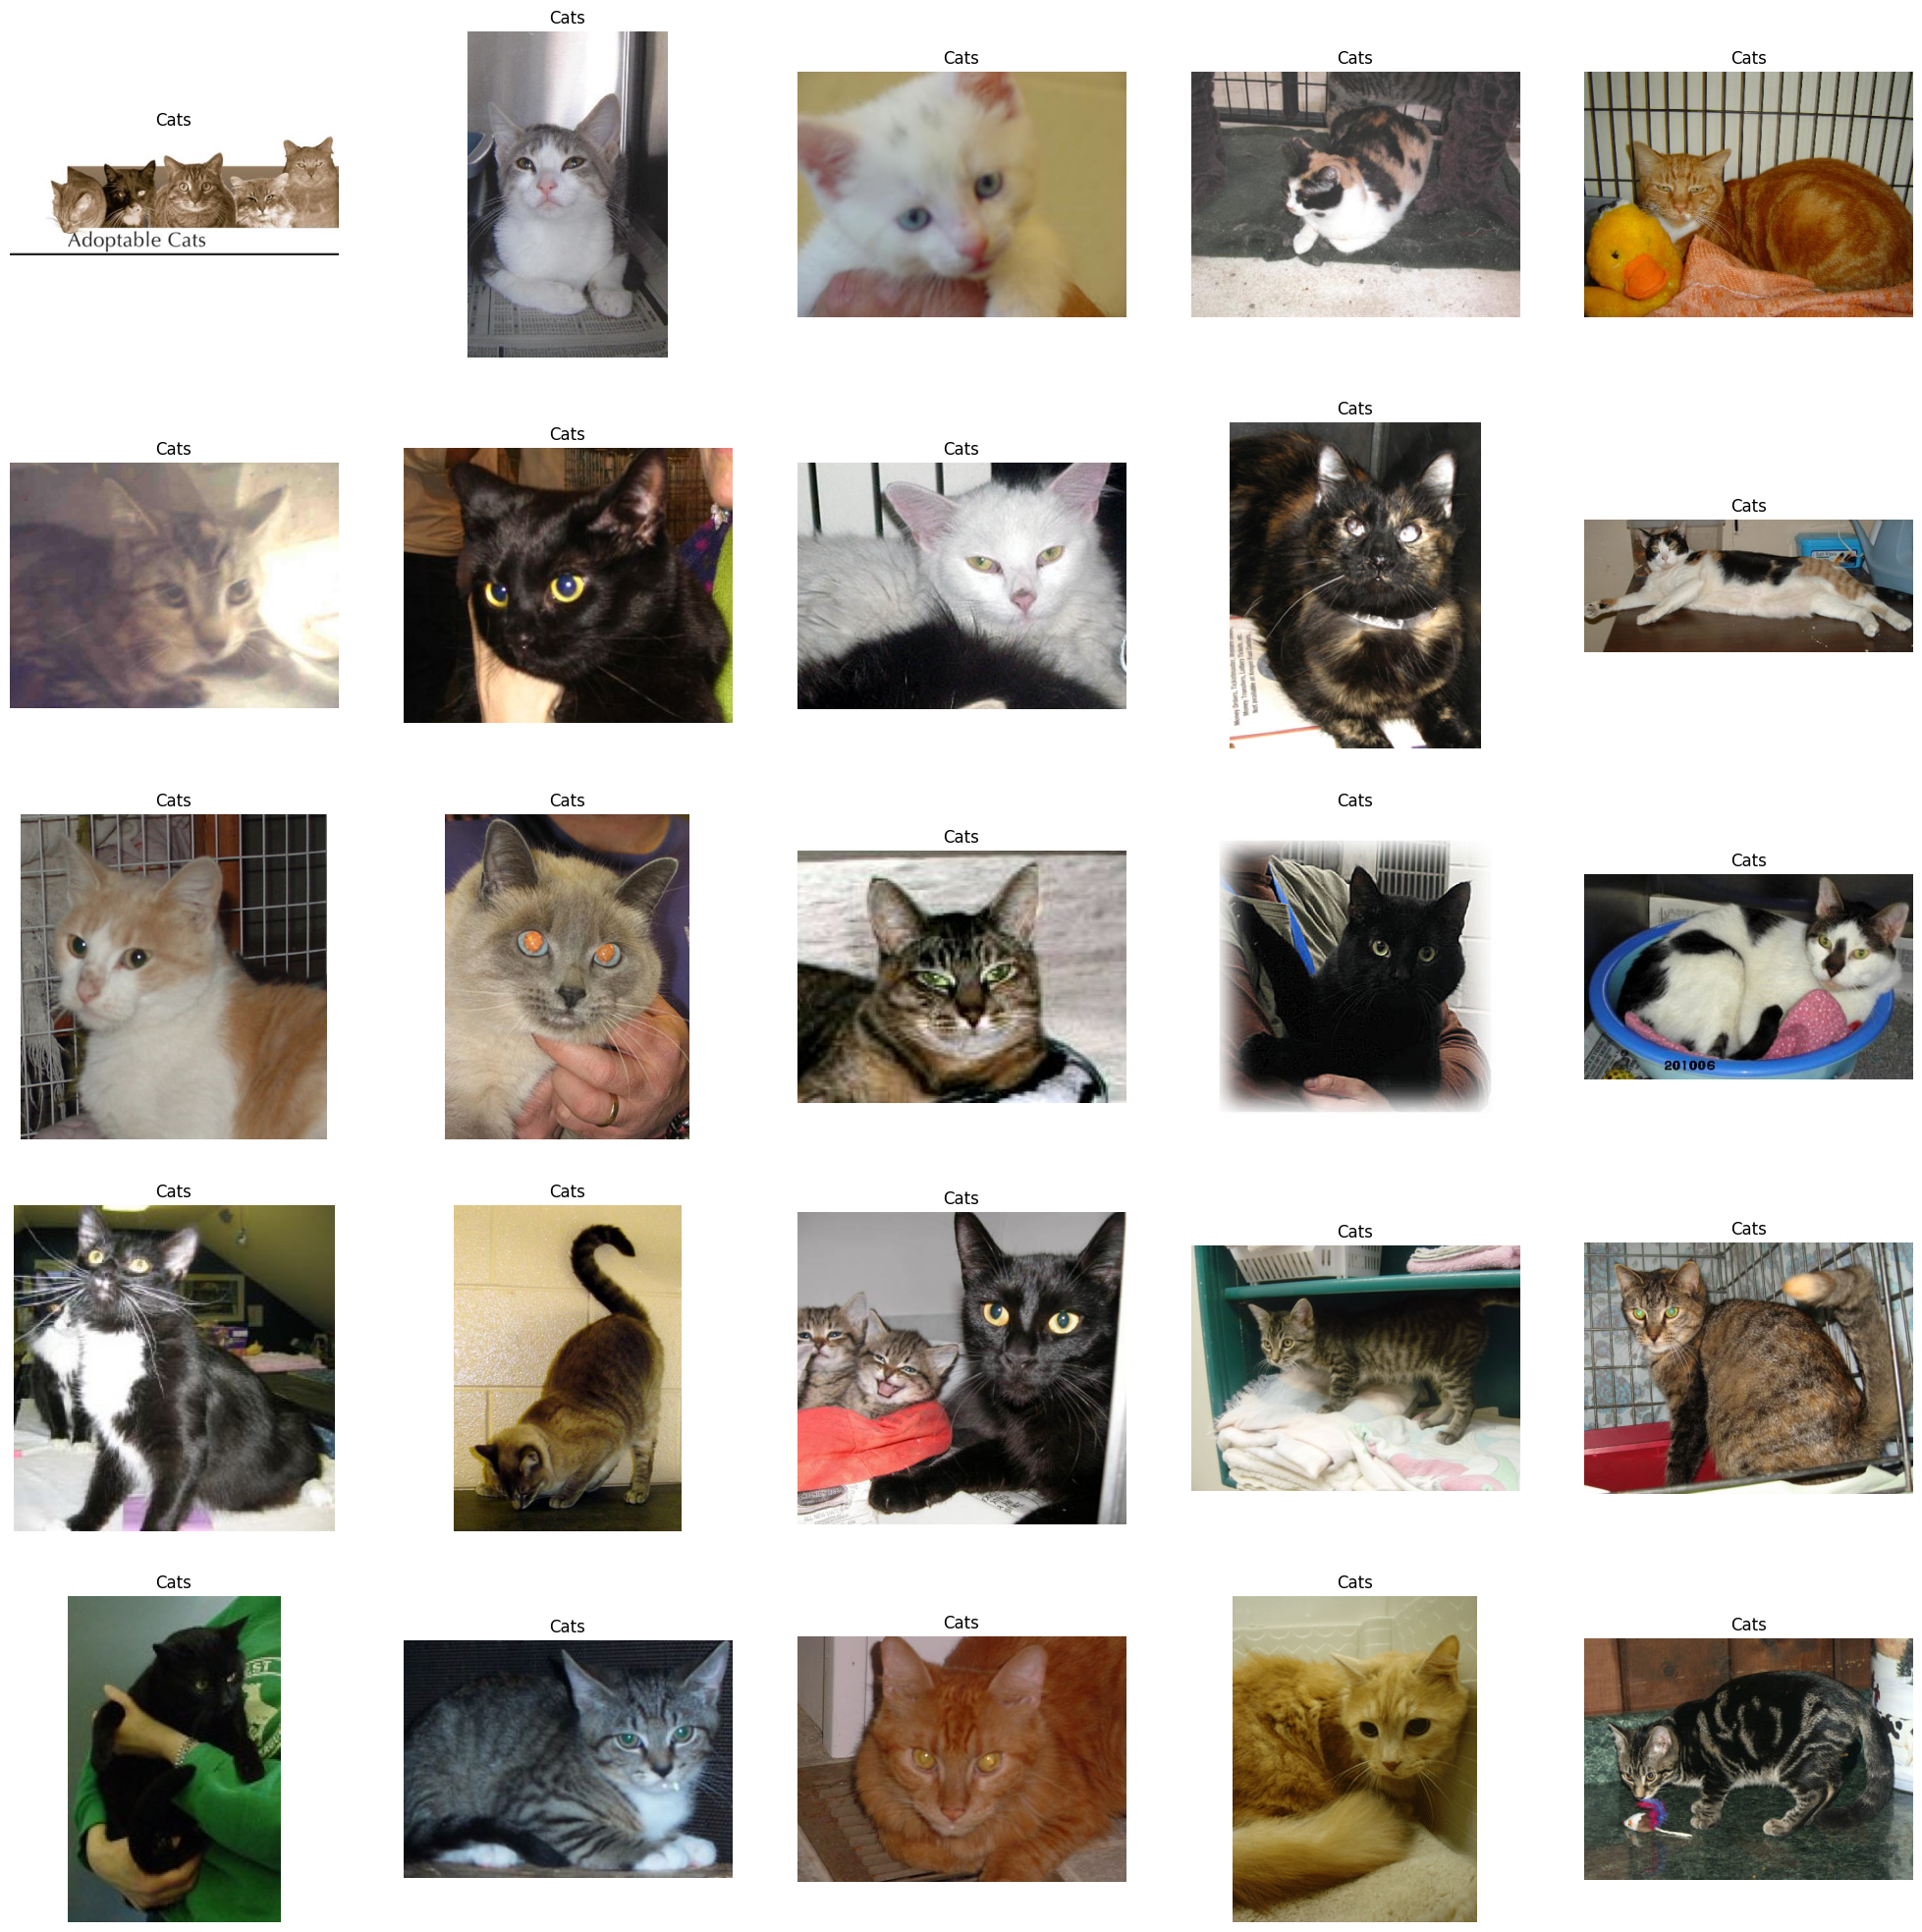

In [11]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Axes: ylabel='count'>

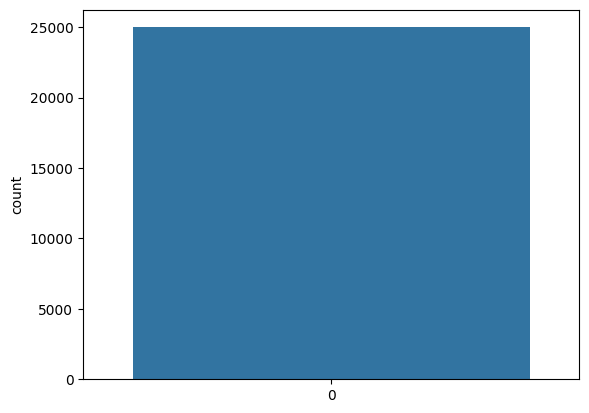

In [12]:
import seaborn as sns
sns.countplot(df['label'])

In [13]:
df['label'] = df['label'].astype('str')

In [14]:
df.head()


images label
0  PetImages/Dog/11379.jpg     1
1   PetImages/Cat/4795.jpg     0
2   PetImages/Dog/6711.jpg     1
3   PetImages/Cat/6097.jpg     0
4   PetImages/Cat/4459.jpg     0

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [17]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [21]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 454s 11s/step - loss: 0.7154 - accuracy: 0.5135 - val_loss: 0.6836 - val_accuracy: 0.5248
Epoch 2/10
40/40 [==============================] - 461s 11s/step - loss: 0.6599 - accuracy: 0.6041 - val_loss: 0.6411 - val_accuracy: 0.6444
Epoch 3/10
40/40 [==============================] - 445s 11s/step - loss: 0.6249 - accuracy: 0.6608 - val_loss: 0.5941 - val_accuracy: 0.6970
Epoch 4/10
40/40 [==============================] - 454s 11s/step - loss: 0.5886 - accuracy: 0.6889 - val_loss: 0.5453 - val_accuracy: 0.7240
Epoch 5/10
40/40 [==============================] - 463s 11s/step - loss: 0.5488 - accuracy: 0.7171 - val_loss: 0.5241 - val_accuracy: 0.7478
Epoch 6/10
40/40 [==============================] - 463s 11s/step - loss: 0.5285 - accuracy: 0.7358 - val_loss: 0.5175 - val_accuracy: 0.7510
Epoch 7/10
40/40 [==============================] - 461s 11s/step - loss: 0.5099 - accuracy: 0.7494 - val_loss: 0.4774 - val_accuracy: 0.7788
Epoch 

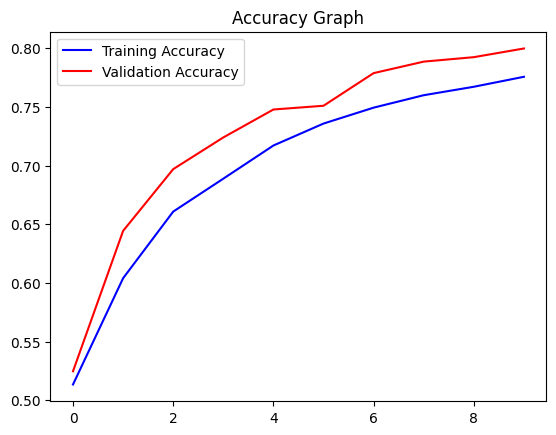

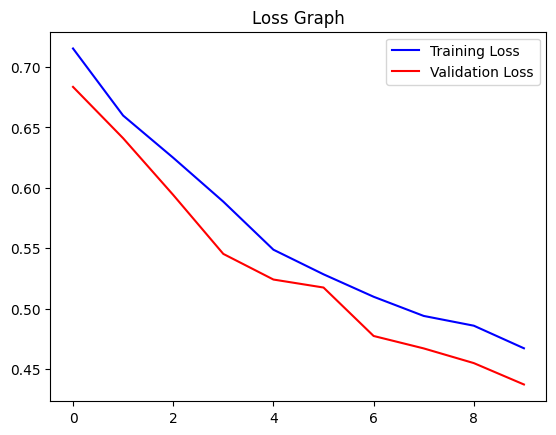

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [26]:
image_path = "//content/16.jpg"
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 39ms/step
Dog


Enter the path to the image file: /content/2.jpg
1/1 [==============================] - 0s 29ms/step


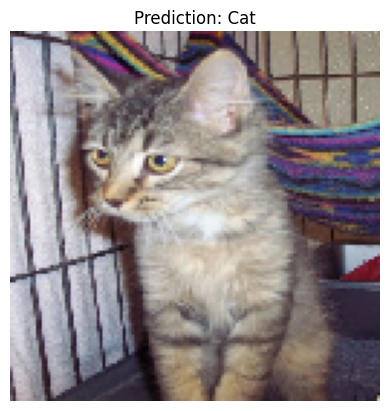

In [63]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import numpy as np

image_path = input("Enter the path to the image file: ")

img = load_img(image_path, target_size=(128, 128))
img = np.array(img) / 255.0
img = img.reshape(1, 128, 128, 3)

pred = model.predict(img)
label = 'Dog' if pred[0] > 0.5 else 'Cat'

plt.imshow(img[0])
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()


For example, here we download and display a PNG image of the Colab logo:

Enter the path to the image file: /content/0.jpg
1/1 [==============================] - 0s 28ms/step
